# Lab: Support Vector Machines

We use the `Scikit-Learn` library in `Python` to demonstrate the
support vector classifier and the SVM.

## Support Vector Classifier

The `Scikit-Learn` library contains
implementations for a number of statistical learning methods. In
particular, the `SVC()` function can be used to fit a support
vector classifier when the argument `kernel="linear"` is used.
This function uses a slightly different formulation from
(9.14) and (9.25) for the support vector
classifier.  A `cost` argument allows us to specify the cost of
a violation to the margin.  When the `cost` argument is small,
then the margins will be wide and many support vectors will be on the
margin or will violate the margin.  When the `cost` argument is
large, then the margins will be narrow and there will be few support
vectors on the margin or violating the margin.

We now use the `SVC()` function to fit the support vector classifier for a given value of the `cost` parameter.
Here we demonstrate the use of this function on a two-dimensional example so that we can plot the resulting decision boundary. We begin by generating
the observations, which belong to two classes, and checking whether the classes are linearly separable.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [38]:
# We'll define a function to draw a nice plot of an SVM

def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated
    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='x', s=100, linewidths=1)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

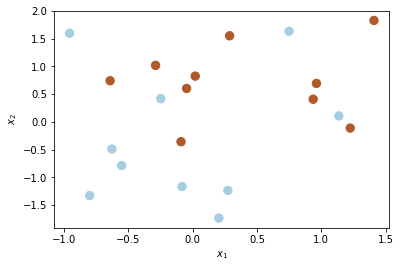

In [60]:
prng = np.random.default_rng(seed=5)
X = prng.normal(size=(20, 2))
y = np.repeat([-1, 1], 10)
X[y==1] += 1
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

They are not. Next, we fit the support vector classifier. Note that in order for the `SVC()` function to perform classification (as opposed to SVM-based regression), we must encode the response as a factor variable.
We now create a data frame with the response coded as a factor.

In [61]:
svc = SVC(C=10, kernel='linear')
svc.fit(X, y);

We can now plot the support vector classifier obtained:

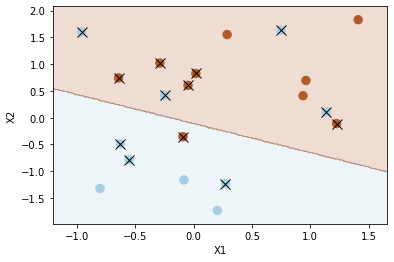

Number of support vectors:  13


In [62]:
plot_svc(svc, X, y)

Note that the two arguments to the
`plot_svc()` function are the output of the call to `SVC().fit()`, as well as the data used in the call to `SVC()`.
The region of feature space that will be assigned to the $-1$ class is shown in light blue, and the region that will be assigned to the $+1$ class is shown in red.
The decision boundary between the two classes is linear (because we used the argument `kernel="linear"`), though due to the
way in which the plotting function is implemented in this library the decision boundary looks somewhat jagged in the plot.
The support vectors are plotted as crosses and the remaining observations are plotted as circles; we see here that there are nine support vectors. We can determine their identities as follows:

In [63]:
svc.support_

array([ 1,  2,  3,  4,  5,  6,  9, 13, 14, 15, 17, 18, 19], dtype=int32)

In [64]:
y[svc.support_]

array([-1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1])

This tells us, for instance, that there were 13 support vectors, 7 in one class and 6 in the other.

What if we instead used a smaller value of the cost parameter?

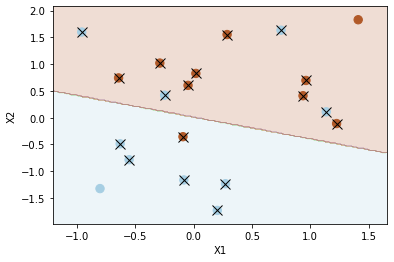

Number of support vectors:  18


In [65]:
svc2 = SVC(C=0.1, kernel='linear')
svc2.fit(X, y)
plot_svc(svc2, X, y)

Now that a smaller value of the cost parameter is being used, we obtain a larger number of support vectors, because the margin is now wider. Unfortunately, the `SVC()` function does not explicitly output the coefficients of the linear decision boundary obtained when the support vector classifier is fit, nor does it output the width of the margin.

We can choose a good value of `C` using cross-validation.

The  𝚜𝚔𝚕𝚎𝚊𝚛𝚗.𝚐𝚛𝚒𝚍_𝚜𝚎𝚊𝚛𝚌𝚑  module includes a a function  𝙶𝚛𝚒𝚍𝚂𝚎𝚊𝚛𝚌𝚑𝙲𝚅()  to perform cross-validation. In order to use this function, we pass in relevant information about the set of models that are under consideration. The following command indicates that we want perform 10-fold cross-validation to compare SVMs with a linear kernel, using a range of values of the cost parameter:

In [66]:
from sklearn.model_selection import GridSearchCV

# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='accuracy')

We can easily access the cross-validation errors for each of these models:

In [67]:
clf.cv_results_

{'mean_fit_time': array([0.00055437, 0.00015593, 0.00015528, 0.00013399, 0.0001508 ,
        0.00018737, 0.00031252]),
 'std_fit_time': array([1.39515243e-04, 3.57669192e-05, 4.53009166e-05, 2.58329584e-06,
        6.89953050e-06, 4.04364447e-05, 1.13173399e-04]),
 'mean_score_time': array([0.00042217, 0.00011222, 0.00012844, 0.00010319, 0.0001117 ,
        0.00013933, 0.00012314]),
 'std_score_time': array([2.32585360e-04, 8.96152613e-06, 4.71750848e-05, 1.33939475e-06,
        4.39266417e-06, 3.29772112e-05, 1.75759130e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([1., 1., 1., 1., 1., 1., 1.]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split2_test_score': array([0.5, 0.5, 0.5, 0.5

The  𝙶𝚛𝚒𝚍𝚂𝚎𝚊𝚛𝚌𝚑𝙲𝚅()  function stores the best parameters obtained, which can be accessed as follows:

In [68]:
clf.best_params_

{'C': 0.1}

We see that  `cost=0.1` results in the lowest cross-validation error rate.
The `GridSearchCV()` function stores the best model obtained, which can be accessed as follows:

In [69]:
bestmod = clf.best_estimator_
bestmod

SVC(C=0.1, kernel='linear')

The `predict()` function can be used to predict the class label on a set of test observations, at any given value of the cost parameter. We begin by generating a
test data set.

In [70]:
X_test = prng.normal(size=(20, 2))
y_test = prng.choice([-1, 1], 20)
X_test[y_test == 1] += 1

Now we predict the class labels of these test observations. Here we use the best model obtained through cross-validation in order to make predictions.

In [71]:
ypred = bestmod.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, ypred), index=bestmod.classes_, columns=bestmod.classes_)

,-1,1
-1,6,5
1,2,7


Thus, with this value of `cost`, 13 of the test observations are correctly classified.
What if we had instead used `cost=1`?

In [73]:
svc3 = SVC(C=1, kernel='linear')
svc3.fit(X, y)

y_pred = svc3.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, y_pred), index=svc3.classes_, columns=svc3.classes_)

,-1,1
-1,5,6
1,2,7


In this case one additional observations are misclassified.

Now consider a situation in which the two classes are linearly separable. Then we can
find a separating hyperplane using the `svm()` function.
We first further separate the two classes in our simulated data so that they are linearly separable:

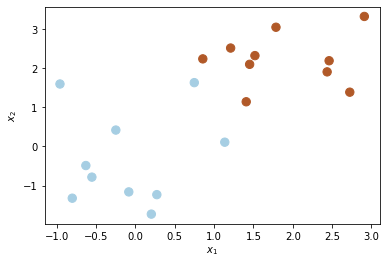

In [74]:
X[y == 1] += 1.5
plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap=plt.cm.Paired)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

Now the observations are just barely linearly separable.
We fit the support vector classifier and plot the resulting hyperplane, using a very large value of `cost` so that no observations are misclassified.

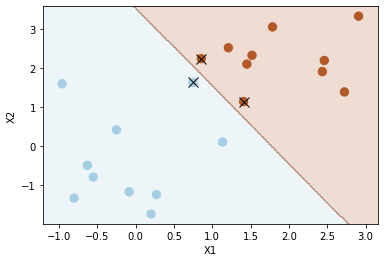

Number of support vectors:  3


In [75]:
svc4 = SVC(C=1e5, kernel='linear')
svc4.fit(X, y)
plot_svc(svc4, X, y)

No training errors were made and only three support vectors were used.
However, we can see from the figure that the margin is very narrow (because the observations that are not support vectors, indicated as crosses, are very close to the decision boundary). It seems likely that this model will perform poorly on test data. We now try a smaller value of `cost`:

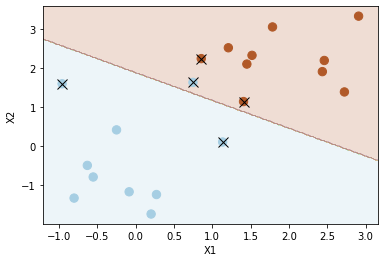

Number of support vectors:  5


In [76]:
svc4 = SVC(C=1, kernel='linear')
svc4.fit(X, y)
plot_svc(svc4, X, y)

Using `cost = 1`, we misclassify a training observation, but we also obtain a much wider margin and make use of seven support vectors. It seems likely that this model will perform better on test data than the model with 
 `cost = 1e5`.

## Support Vector Machine

In order to fit an SVM using a non-linear kernel, we once again use the `SVC()` function. However, now we use a different value of the parameter `kernel`. To
fit an SVM with a polynomial kernel we use `kernel="poly"`, and to fit an SVM with a radial kernel we use `kernel = "rbf"`.
In the former case we also use the `degree` argument to specify a degree for the polynomial kernel (this is $d$ in (9.22)), and in the latter case we use `gamma` to specify a value of $\gamma$ for the radial basis kernel (9.24).

We first generate some data with a non-linear class boundary, as follows:

In [ ]:
from sklearn.model_selection import train_test_split

X = prng.normal(size=(200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1, 50)])

Text(0, 0.5, 'X2')

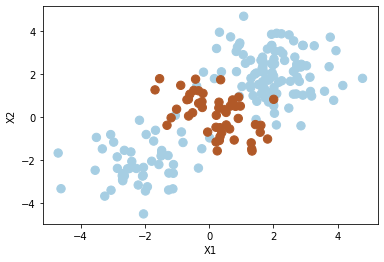

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

Plotting the data makes it clear that the class boundary is indeed non-linear:

The data is randomly split into training and testing groups. We then fit the training data using the `svm()` function with a radial kernel and $\gamma=1$:

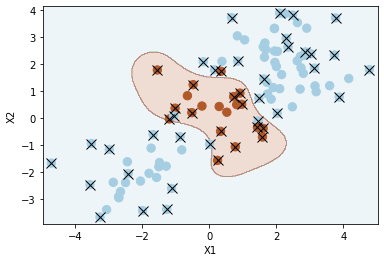

Number of support vectors:  47


In [84]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)
plot_svc(svm, X_train, y_train)

The plot shows that the resulting  SVM has a decidedly non-linear  boundary.

We can see from the figure that there are a fair number of training errors in this SVM fit.
If we increase the value of `cost`, we can reduce the number of
training errors. However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

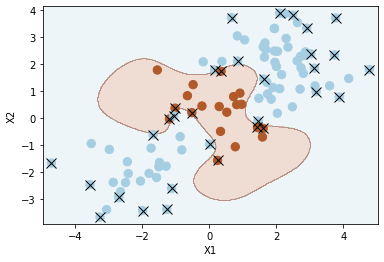

Number of support vectors:  32


In [86]:
# Increasing C parameter, allowing more flexibility
svm2 = SVC(C=1e5, kernel='rbf', gamma=1.0)
svm2.fit(X_train, y_train)
plot_svc(svm2, X_train, y_train)

We can perform cross-validation using `GridSearchCV()` to select the best choice of $\gamma$ and `cost` for an SVM with a radial kernel:

In [87]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1, 2, 3, 4]}]
clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1, 'gamma': 1}

Therefore, the best choice of parameters involves `cost=1` and `gamma=1.0`.
We can view the test set predictions for this model by applying the `predict()` function to the data.

In [88]:
print(confusion_matrix(y_test, clf.best_estimator_.predict(X_test)))
print(clf.best_estimator_.score(X_test, y_test))

[[68  2]
 [ 4 26]]
0.94


$6\,\%$ of test observations are misclassified by this SVM.

## ROC Curves

The `auc()` function can be used to produce ROC curves such as those in Figures9.10 and 9.11.

In [90]:
from sklearn.metrics import auc, roc_curve

Let's start by fitting two models, one more flexible than the other:

In [91]:
# More constrained model
svm3 = SVC(C=1, kernel='rbf', gamma=1)
svm3.fit(X_train, y_train)

# More flexible model
svm4 = SVC(C=1, kernel='rbf', gamma=50)
svm4.fit(X_train, y_train)

SVC(C=1, gamma=50)

SVMs and support vector classifiers output class labels for each observation. However, it is also possible to obtain *fitted values* for each observation, which are the numerical scores used to obtain the class labels. For instance, in the case of a support vector
classifier, the fitted value for an observation $X= (X_1, X_2, \ldots, X_p)^T$ takes the form $\hat{\beta}_0 + \hat{\beta}_1 X_1 + \hat{\beta}_2 X_2 + \cdots + \hat{\beta}_p X_p$. For an SVM with a non-linear kernel, the equation that yields the fitted value is given in (9.23). In essence, the sign of the fitted value determines on which side of the decision boundary the observation lies. Therefore, the relationship between the fitted value and the class prediction for a given observation is simple: if the fitted value exceeds zero then the observation is assigned to one class, and if it is less than zero then it is assigned to the other.
In order to obtain the fitted values for a given SVM model fit, we use `decision_function` method of the `SVC` class.

In [92]:
y_train_score3 = svm3.decision_function(X_train)
y_train_score4 = svm4.decision_function(X_train)

Now we can produce the ROC plot. Note we use the negative of the fitted values so that negative values correspond to class 1 and positive values to class 2.

SVM appears to be producing accurate predictions. By increasing $\gamma$ we can produce a more flexible fit and generate further improvements in accuracy.

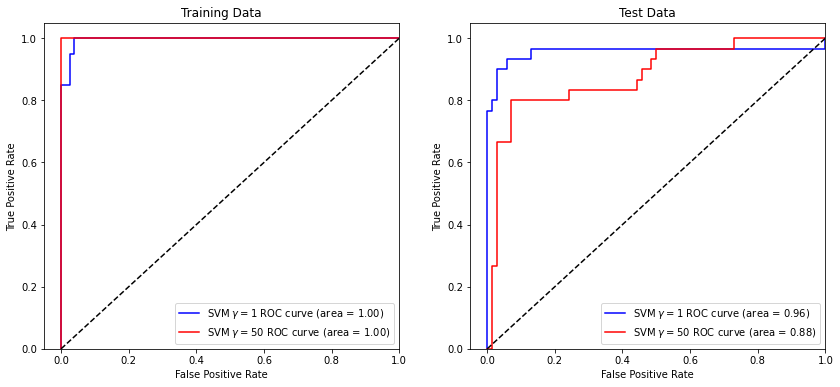

In [93]:
false_pos_rate3, true_pos_rate3, _ = roc_curve(y_train, y_train_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_train, y_train_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax1.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax1.set_title('Training Data')

y_test_score3 = svm3.decision_function(X_test)
y_test_score4 = svm4.decision_function(X_test)

false_pos_rate3, true_pos_rate3, _ = roc_curve(y_test, y_test_score3)
roc_auc3 = auc(false_pos_rate3, true_pos_rate3)

false_pos_rate4, true_pos_rate4, _ = roc_curve(y_test, y_test_score4)
roc_auc4 = auc(false_pos_rate4, true_pos_rate4)

ax2.plot(false_pos_rate3, true_pos_rate3, label='SVM $\gamma = 1$ ROC curve (area = %0.2f)' % roc_auc3, color='b')
ax2.plot(false_pos_rate4, true_pos_rate4, label='SVM $\gamma = 50$ ROC curve (area = %0.2f)' % roc_auc4, color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

When we compute the ROC curves on the test data, the model with $\gamma=1$ appears to provide the most accurate results.

## SVM with Multiple Classes

If the response is a factor containing more than two levels, then the `svm()` function will  perform multi-class classification using the one-versus-one approach. We explore that setting here by generating a third class of observations.

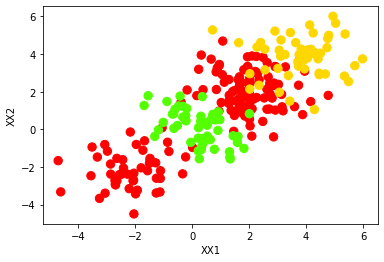

In [94]:
XX = np.vstack([X, prng.normal(size=(50, 2))])
yy = np.hstack([y, np.repeat(0, 50)])
XX[yy == 0] += 4

plt.scatter(XX[:, 0], XX[:, 1], s=70, c=yy, cmap=plt.cm.prism)
plt.xlabel('XX1')
plt.ylabel('XX2');

We now fit an SVM to the data:

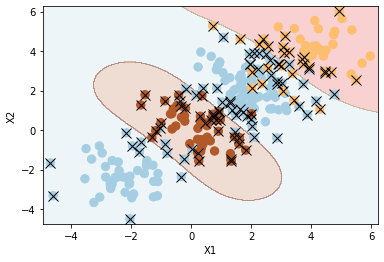

Number of support vectors:  109


In [95]:
svm5 = SVC(C=1, kernel='rbf')
svm5.fit(XX, yy)
plot_svc(svm5, XX, yy)

The `SVR` function can be used to perform support vector regression.

## Application to Gene Expression Data

We now examine the `Khan` data set, which  consists of a number of tissue samples corresponding to four distinct types of small
round blue cell tumors. For each tissue sample, gene expression measurements are available.
The data set consists of training data, `xtrain` and `ytrain`, and testing data, `xtest` and `ytest`.

In [100]:
X_train = pd.read_csv('data/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('data/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
X_test = pd.read_csv('data/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('data/Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

We examine the dimension of the data:

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63, 2308)
(20, 2308)
(63,)
(20,)


This data set consists of expression measurements for $2{,}308$  genes.  The training and test sets consist of $63$ and $20$ observations respectively.

In [106]:
pd.Series(y_train).value_counts().sort_index()

1     8
2    23
3    12
4    20
dtype: int64

In [108]:
pd.Series(y_test).value_counts().sort_index()

1    3
2    6
3    6
4    5
dtype: int64

We will use a support vector approach to predict cancer subtype using gene expression measurements.
In this data set, there are a very large number of  features relative to the number of observations. This suggests that we should use a  linear kernel, because the additional flexibility that will
result from using a polynomial or radial kernel is unnecessary. 


In [113]:
# This model gives identical results to the svm() of the R package e1071, also based on libsvm library.
svc = SVC(kernel='linear', C=10)

# This model is based on liblinear library and gives 100 score on the test data. 
#svc = LinearSVC()

svc.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [114]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm_df

True,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


We  see that there are *no* training errors. In fact, this is not surprising, because
the large number of variables relative to the number of observations implies that it is easy to find hyperplanes that fully separate the classes. We are most interested not in the support vector classifier's performance on the training observations, but rather its performance on the test observations.

In [115]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm_df

True,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5


We see that using `cost = 10` yields two test set errors on this
data.